<a href="https://colab.research.google.com/github/manishgurungxon/MachineLearningPy/blob/main/Regression_Multivarient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

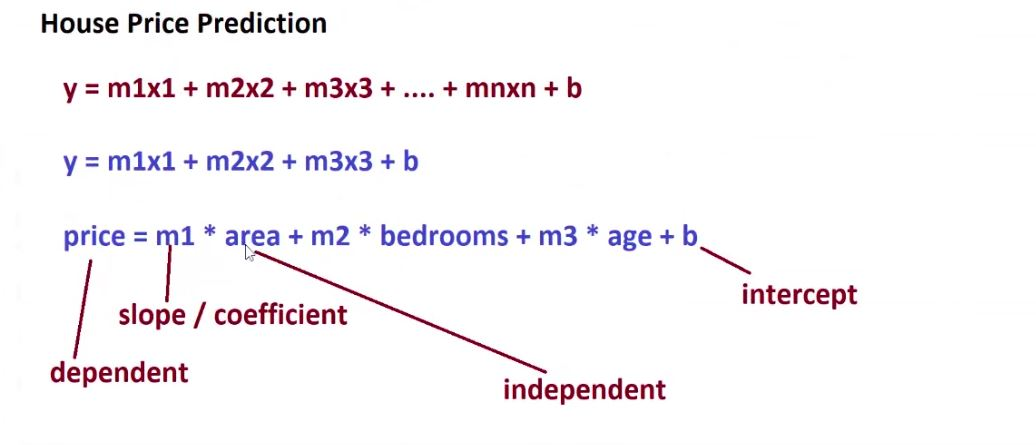

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv("/content/sample_data/homeprices.csv")

In [10]:
df.head(10)
#let us check if it has any missing values

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [12]:
#We found that 3200 area has missing value for bedrooms.
# we wil use the median as a replacing value 
# why we are not using simpleimputer is because this is a small table with only 1 missing value
df.bedrooms.median()

4.0

In [13]:
#Here we are going to select bedroom column and fill NA value with the median
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())

In [15]:
#lets check the new table
df


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [18]:
#The fit() method takes the training data as arguments, 
#which can be one array in the case of unsupervised learning, 
#or two arrays in the case of supervised learning
reg = linear_model.LinearRegression()
reg.fit(df.drop("price", axis='columns'), df.price)

LinearRegression()

In [20]:
reg.coef_
# we were looking for m1, m2, m3 values which we found using coefficient

array([  112.06244194, 23388.88007794, -3231.71790863])

In [21]:
# now lets look for intercept_
reg.intercept_
# got our intercept

221323.00186540396

In [24]:
# now we have our formula
# (dependent)y = m1 * (independent)area + m2*(independent)bedrooms + m3*(independent)age + b(Intercept)
# now lets take a scenario with independent variables and see our dependent variable outcome that is price
reg.predict([[3000, 4, 35],[3000, 4, 45],[3000, 4, 50]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([537955.72120141, 505638.54211508, 489479.95257192])

In [25]:
#lets input the values we got from our learning
# lets use the formula and see for 3000 area, 4 bedroom for 50yrs
112.06244194*3000 + 23388.88007794*4 + (-3231.71790863*50) + 221323.00186540396

489479.95256566396

In [27]:
#lets check if the output matches our prediction 
reg.predict([[3000, 4, 50]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([489479.95257192])

In [ ]:
# so it does match with our final result.